## Copying images to training, validation, and test directories

In [1]:
import os, shutil
from PIL import *

In [3]:
# Path to the directory where the original dataset was uncompressed
original_dataset_dir = 'C:\\Users\\SEZYUEN\\Desktop\\data\\train'

# Directory where to store smaller dataset
base_dir = 'C:\\Users\\SEZYUEN\\Desktop\\data\\cats_and_dogs_small'
os.mkdir(base_dir)

In [4]:
# Directory for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
# Diretory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Diretory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Diretory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Diretory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Diretory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Diretory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
# Copies the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# Copies the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# Check, print out how many pictures are in each training split
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Building the network

Here, because you start from inputs of size 150 × 150 (a somewhat arbitrary choice), you end up with feature maps of size 7 × 7 just before the Flatten layer.

The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from 148 × 148 to 7 × 7). This is a pattern you’ll see in almost all convnets.

Because you’re attacking a binary-classification problem, you’ll end the network with a single unit (a Dense layer of size 1) and a sigmoid activation.

In [13]:
# Instantiating a small convnet for dogs & cats classification
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

For the compilation step, you’ll go with the RMSprop optimizer, as usual. Because you ended the network with a single sigmoid unit, you’ll use binary crossentropy as the loss .

In [14]:
# Configuring the model for training
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Data preprocessing

As you know by now, data should be formatted into appropriately preprocessed floating-point tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at **keras.preprocessing.image**. In particular, it contains the class **ImageDataGenerator**, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. This is what you’ll use here.

In [15]:
# Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir, 
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). There are 20 samples in each batch (the batch size).

In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


Let’s fit the model to the data using the generator. You do so using the    fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [17]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 126ms/step - loss: 0.6941 - acc: 0.5450 - val_loss: 0.6846 - val_acc: 0.5450
Epoch 2/30
100/100 [==============================] - 6s 63ms/step - loss: 0.6612 - acc: 0.6035 - val_loss: 0.6421 - val_acc: 0.6240
Epoch 3/30
100/100 [==============================] - 6s 63ms/step - loss: 0.6084 - acc: 0.6595 - val_loss: 0.6473 - val_acc: 0.6010
Epoch 4/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5648 - acc: 0.7025 - val_loss: 0.6417 - val_acc: 0.6500
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5420 - acc: 0.7230 - val_loss: 0.5939 - val_acc: 0.6700
Epoch 6/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5184 - acc: 0.7410 - val_loss: 0.6297 - val_acc: 0.6410
Epoch 7/30
100/100 [==============================] - 6s 63ms/step - loss: 0.4926 - acc: 0.7595 - val_loss: 0.5895 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 7s 66ms/step 

In [18]:
# Saving the model
model.save('cats_and_dogs_small_1.h5')

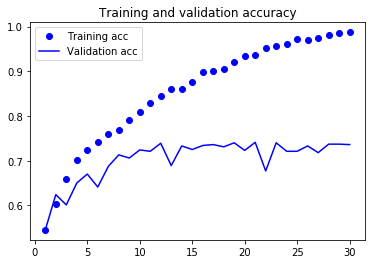

In [22]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

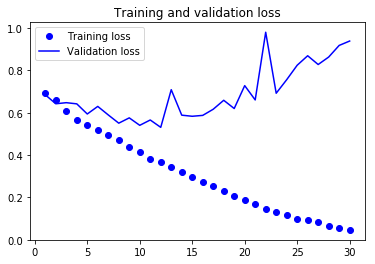

In [23]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly
over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
The validation loss reaches its minimum after only five epochs and then stalls, whereas
the training loss keeps decreasing linearly until it reaches nearly 0.

Because you have relatively few training samples (2,000), overfitting will be your
number-one concern. You already know about a number of techniques that can help
mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now
going to work with a new one, specific to computer vision and used almost universally
when processing images with deep-learning models: *data augmentation.*

## Using data augmentation

Overfitting is caused by having too few samples to learn from, rendering you unable
to train a model that can generalize to new data. Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand: you would
never overfit. Data augmentation takes the approach of generating more training data
from existing training samples, by augmenting the samples via a number of random
transformations that yield believable-looking images. The goal is that at training time,
your model will never see the exact same picture twice. This helps expose the model
to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to
be performed on the images read by the ImageDataGenerator instance. Let’s get
started with an example.

In [25]:
# Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

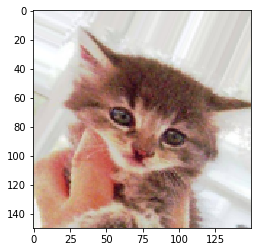

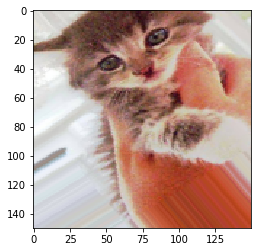

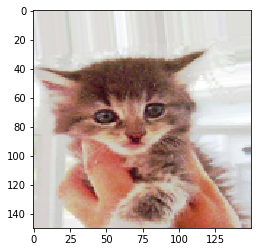

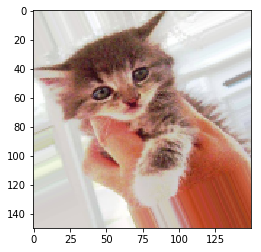

In [28]:
# Displaying some randomly augmented training images
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # Chooses one image to augment
img = image.load_img(img_path, target_size=(150,150)) # Reads the image and resizes it
x = image.img_to_array(img) # Convets it to a Numpy array with shape (150,150,3)
x = x.reshape((1,) + x.shape) # Reshapes it to (1,150,150,3)

# Generates batches of andomly transformed mages. Loops indefinitely, so u need to break the loop at some point
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

If you train a new network using this data-augmentation configuration, the network
will never see the same input twice. But the inputs it sees are still heavily intercorrelated,
because they come from a small number of original images—you can’t produce
new information, you can only remix existing information. As such, this may not
be enough to completely get rid of overfitting. To further fight overfitting, you’ll also
add a Dropout layer to your model, right before the densely connected classifier.

In [29]:
# Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [30]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [31]:
# Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # The validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
            train_dir, 
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 29s 285ms/step - loss: 0.6990 - acc: 0.5085 - val_loss: 0.6983 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 13s 133ms/step - loss: 0.6862 - acc: 0.5365 - val_loss: 0.6981 - val_acc: 0.5010
Epoch 3/100
100/100 [==============================] - 13s 132ms/step - loss: 0.6796 - acc: 0.5550 - val_loss: 0.8026 - val_acc: 0.5000
Epoch 4/100
100/100 [==============================] - 13s 132ms/step - loss: 0.6713 - acc: 0.5845 - val_loss: 0.6528 - val_acc: 0.6040
Epoch 5/100
100/100 [==============================] - 13s 135ms/step - loss: 0.6626 - acc: 0.5945 - val_loss: 0.6372 - val_acc: 0.6440
Epoch 6/100
100/100 [==============================] - 14s 137ms/step - loss: 0.6418 - acc: 0.6200 - val_loss: 0.6718 - val_acc: 0.5680
Epoch 7/100
100/100 [==============================] - 15s 153ms/step - loss: 0.6326 - acc: 0.6425 - val_loss: 0.6120 - val_acc: 0.6440
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 15s 151ms/step - loss: 0.4434 - acc: 0.7960 - val_loss: 0.4265 - val_acc: 0.8020
Epoch 62/100
100/100 [==============================] - 15s 155ms/step - loss: 0.4513 - acc: 0.7930 - val_loss: 0.4703 - val_acc: 0.7870
Epoch 63/100
100/100 [==============================] - 15s 154ms/step - loss: 0.4331 - acc: 0.7910 - val_loss: 0.4435 - val_acc: 0.7950
Epoch 64/100
100/100 [==============================] - 15s 151ms/step - loss: 0.4430 - acc: 0.7940 - val_loss: 0.5046 - val_acc: 0.7660
Epoch 65/100
100/100 [==============================] - 15s 152ms/step - loss: 0.4469 - acc: 0.7955 - val_loss: 0.4352 - val_acc: 0.8010
Epoch 66/100
100/100 [==============================] - 15s 152ms/step - loss: 0.4344 - acc: 0.7945 - val_loss: 0.4332 - val_acc: 0.7950
Epoch 67/100
100/100 [==============================] - 15s 152ms/step - loss: 0.4369 - acc: 0.8030 - val_loss: 0.4424 - val_acc: 0.8010
Epoch 68/100
100/100 [===================

In [34]:
model.save('cats_and_dogs_small_2.h5')

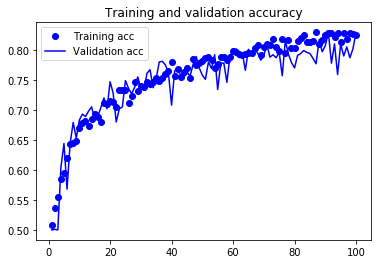

In [35]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

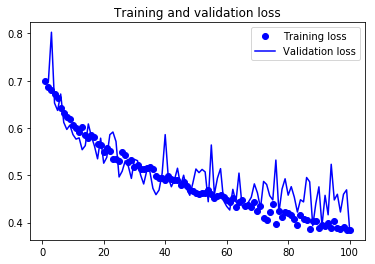

In [36]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Thanks to data augmentation
and dropout, you’re no longer overfitting: the training curves are closely tracking
the validation curves. You now reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.

By using regularization techniques even further, and by tuning the network’s parameters
(such as the number of filters per convolution layer, or the number of layers in
the network), you may be able to get an even better accuracy, likely up to 86% or 87%.
But it would prove difficult to go any higher just by training your own convnet from
scratch, because you have so little data to work with. As a next step to improve your
accuracy on this problem, you’ll have to use a pretrained model

## Using a pretrained convnet

There are two ways to use a pretrained network: *feature extraction* and *fine-tuning*.

The VGG16 model, among others, comes prepackaged with Keras. You can import
it from the *keras.applications* module.

In [42]:
# Instantiating the VGG16 convolutional base
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [43]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

**FEATURE EXTRACTION WITH DATA AUGMENTATION**

Because models behave just like layers, you can add a model (like conv_base) to a
Sequential model just like you would add a layer.

In [45]:
# Adding a densely connected classifier on top of the convolutional base
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before you compile and train the model, it’s very important to freeze the convolutional
base. *Freezing* a layer or set of layers means preventing their weights from being
updated during training. If you don’t do this, then the representations that were previously
learned by the convolutional base will be modified during training. Because
the Dense layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously
learned.

In [47]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


With this setup, only the weights from the two Dense layers that you added will be
trained. That’s a total of four weight tensors: two per layer (the main weight matrix
and the bias vector). Note that in order for these changes to take effect, you must first
compile the model. If you ever modify weight trainability after compilation, you
should then recompile the model, or these changes will be ignored.

In [48]:
# Training the model end to end with a frozen convolutional base
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # The validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
            train_dir, 
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [50]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 203ms/step - loss: 0.5946 - acc: 0.6970 - val_loss: 0.4613 - val_acc: 0.8070
Epoch 2/30
100/100 [==============================] - 19s 188ms/step - loss: 0.4826 - acc: 0.7815 - val_loss: 0.3802 - val_acc: 0.8350
Epoch 3/30
100/100 [==============================] - 19s 186ms/step - loss: 0.4315 - acc: 0.8205 - val_loss: 0.3397 - val_acc: 0.8610
Epoch 4/30
100/100 [==============================] - 19s 186ms/step - loss: 0.3983 - acc: 0.8345 - val_loss: 0.3147 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 19s 187ms/step - loss: 0.3850 - acc: 0.8345 - val_loss: 0.3118 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 0.3663 - acc: 0.8355 - val_loss: 0.2872 - val_acc: 0.8760
Epoch 7/30
100/100 [==============================] - 19s 187ms/step - loss: 0.3476 - acc: 0.8505 - val_loss: 0.2813 - val_acc: 0.8820
Epoch 8/30
100/100 [==============================] - 1

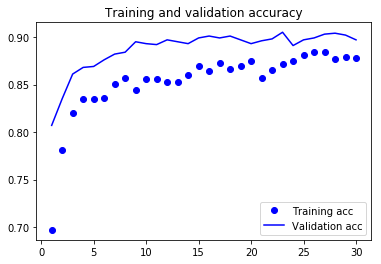

In [51]:
# Displaying curves of loss and accuracy during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

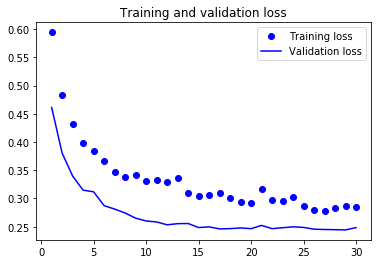

In [52]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Fine-tuning**

Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant
for the problem at hand.

The
steps for fine-tuning a network are as follow:
- 1 Add your custom network on top of an already-trained base network.
- 2 Freeze the base network.
- 3 Train the part you added.
- 4 Unfreeze some layers in the base network.
- 5 Jointly train both these layers and the part you added.

You already completed the first three steps when doing feature extraction. Let’s proceed
with step 4: you’ll unfreeze your conv_base and then freeze individual layers
inside it.

In [53]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

You’ll fine-tune the last three convolutional layers, which means all layers up to
block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and
block5_conv3 should be trainable

In [54]:
# Freezing all layers up to a specific one
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now you can begin fine-tuning the network. You’ll do this with the RMSProp optimizer,
using a very low learning rate. The reason for using a low learning rate is that
you want to limit the magnitude of the modifications you make to the representations
of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

In [55]:
# Fine-tuning the model
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [56]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 232ms/step - loss: 0.2966 - acc: 0.8700 - val_loss: 0.2265 - val_acc: 0.9100
Epoch 2/100
100/100 [==============================] - 22s 220ms/step - loss: 0.2422 - acc: 0.8975 - val_loss: 0.2062 - val_acc: 0.9220
Epoch 3/100
100/100 [==============================] - 24s 238ms/step - loss: 0.2487 - acc: 0.8930 - val_loss: 0.1947 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 24s 238ms/step - loss: 0.2185 - acc: 0.9065 - val_loss: 0.2162 - val_acc: 0.91700.2 - ETA: 3s - loss:  - ETA: 0s - loss: 0.2177 - acc: 0.90
Epoch 5/100
100/100 [==============================] - 24s 238ms/step - loss: 0.2060 - acc: 0.9170 - val_loss: 0.1797 - val_acc: 0.9350
Epoch 6/100
100/100 [==============================] - 24s 237ms/step - loss: 0.2045 - acc: 0.9155 - val_loss: 0.2233 - val_acc: 0.9160
Epoch 7/100
100/100 [==============================] - 24s 238ms/step - loss: 0.1823 - acc: 0.9315 - val_loss: 0.2024 - val_a

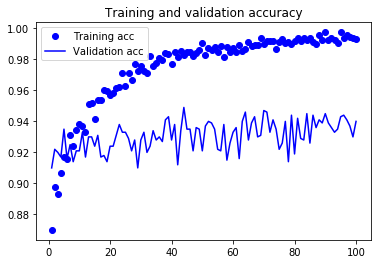

In [57]:
# Displaying curves of loss and accuracy during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

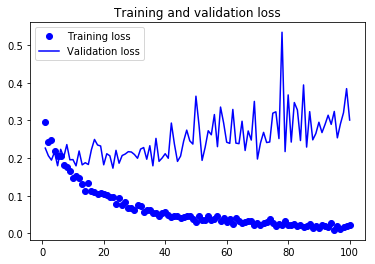

In [58]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()